In [200]:
import numpy as np
from Tensor.matrix import Tensor
from nn.linear import Node , Layer , Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from Optimizer.base import GD
from nn.linear_nn import MLP


In [201]:
# preparing dataset from using sklearn datasets 
# visualize it using matplotlib.pyplot 
x , y = make_blobs(n_samples=400, n_features=2,shuffle=True)
y = np.where(y > 1 , 1, -1)
print('output data is : ', y)
print('input x data is : ', x)

output data is :  [ 1 -1  1  1 -1  1  1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1  1
  1 -1  1  1 -1  1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1
  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1
  1  1 -1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1
  1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1
 -1 -1  1  1 -1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1  1 -1 -1  1  1 -1
  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1
 -1  1 -1 -1 -1  1 -1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1 -1
  1  1 -1  1  1 -1 -1  1  1  1 -1

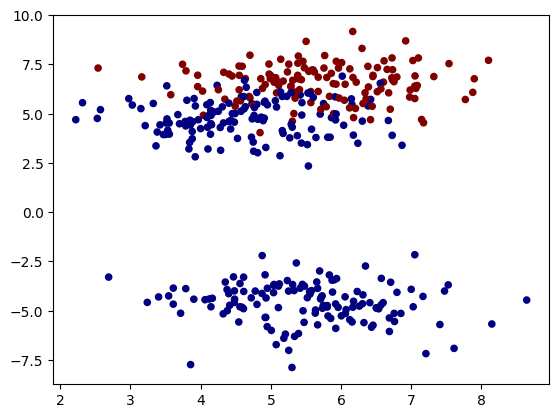

In [202]:
plt.scatter(x[:,0], x[:,1], c=y, s=20, cmap='jet') # this is how data is distributed along the x and y axis


In [203]:
print('shape of x is ',x.shape)
print('shape of y is ',y.shape)

shape of x is  (400, 2)
shape of y is  (400,)


In [204]:
# model building -- a simple dense layer 
model = Dense(n_input=2 ,list_layers=[10,20,30,2])
print('dense layer is ', model)
params = model.parameters()
print('model parameters are ', params)
print('length of model paramters is ', len(params))



dense layer is  Dense of [Layer of [LinearNode2, LinearNode2, LinearNode2, LinearNode2, LinearNode2, LinearNode2, LinearNode2, LinearNode2, LinearNode2, LinearNode2], Layer of [LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10], Layer of [LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20], Layer of [LinearNode30, LinearNode30]]
model parameters are  [Tensor(data:0.21005987889749655,grad:0.0), Tensor

In [205]:
"""
    splitting x and y into training and testing data using sklearn train_test_split function
"""
x_train , x_test , y_train , y_test = train_test_split(x,y,shuffle=True, test_size=0.2)
print('x_train shape is ',x_train.shape)
print('y_train shape is ', y_train.shape)
print('x_test shape is ', x_test.shape)
print('y_test shape is ' , y_test.shape)


x_train shape is  (320, 2)
y_train shape is  (320,)
x_test shape is  (80, 2)
y_test shape is  (80,)


In [206]:
"""
    defining training loop 
"""
def train():

    x_train_feeded_data = [list(map(Tensor, xrow)) for xrow in x_train]
    y_predicted = model(x_train_feeded_data)
    y_pred = []
    for pred in y_predicted:
        y_pred.append(pred[0])
    # print(y_pred)
    # print(y)
    losses = [(1 + -yi*sc).relu() for yi, sc in zip(y, y_pred)]
    data_loss = sum(losses) * (1.0 / len(losses))
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    accuracy = [(yi > 0) == (sc.data > 0) for yi, sc in zip(y, y_pred)]
    correct = 0
    incorrect = 0
    for item in accuracy:
        if item:
            correct += 1
        else:
            incorrect += 1
    acc = correct/(len(accuracy))
    return total_loss ,acc
loss,accuracy = train()
print('loss is : ',loss)
print('accuracy of model is :' ,accuracy)


loss is :  Tensor(data:1.1700517475146484,grad:0.0)
accuracy of model is : 0.346875


In [207]:
for k in range(8):
    
    # forward
    total_loss , acc= train()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 0.001
    for p in model.parameters():
        # print('before updating gradient : ', p.data)
        p.data -= learning_rate * p.grad
        # print('after updating gradient : ',p.data)
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")


    

step 0 loss 1.1700517475146484, accuracy 34.6875%
step 1 loss 1.1700517135043003, accuracy 34.6875%
step 2 loss 1.1700516794939602, accuracy 34.6875%
step 3 loss 1.170051645483626, accuracy 34.6875%
step 4 loss 1.170051611473299, accuracy 34.6875%
step 5 loss 1.1700515774629785, accuracy 34.6875%
step 6 loss 1.1700515434526608, accuracy 34.6875%
step 7 loss 1.1700515094423558, accuracy 34.6875%


In [208]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

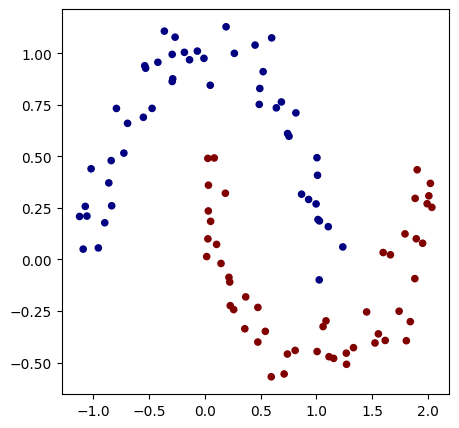

In [209]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [210]:
# initialize a model 
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16)], Layer of [LinearNeuron(16)]]
number of parameters 337


In [211]:
# loss function
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=1.5055365675749517, grad=0) 0.5


In [212]:
# optimization
for k in range(10):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 1.5055365675749517, accuracy 50.0%
step 1 loss 1.1103740612316273, accuracy 50.0%
step 2 loss 1.5870535686196747, accuracy 50.0%
step 3 loss 0.5284859953441844, accuracy 83.0%
step 4 loss 0.5572797253031933, accuracy 82.0%
step 5 loss 0.3374025485217139, accuracy 82.0%
step 6 loss 0.3143994930855118, accuracy 87.0%
step 7 loss 0.29300447960730647, accuracy 84.0%
step 8 loss 0.2762545820239993, accuracy 87.0%
step 9 loss 0.28325187171114197, accuracy 86.0%
